In [1]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=100, Om0=0.25, Ode0=0.75)
from astropy.table import Table
import pandas as pd
from tqdm.notebook import tqdm
from PyAstronomy import pyasl

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
hdul = fits.open('G3CGalv10.fits')
data = hdul[1].data
cols = hdul[1].columns
t=Table(data)

df = t.to_pandas()
df = df.rename(columns={"DEC": "Dec"})

In [4]:
df

,CATAID,RA,Dec,Z,Rpetro,DM_100_25_75,SURVEY_CODE,SigErr,GroupID,RankIterCen,...,CoSepIterCen,AngSepIterCen,RankBCG,SepBCG,CoSepBCG,AngSepBCG,RankCen,SepCen,CoSepCen,AngSepCen
0,6802,174.005984,0.720935,0.051814,18.622816,36.044518,5,24.158697,0,-999,...,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000
1,6803,174.021648,0.754885,0.161697,19.219088,38.683414,5,40.067787,0,-999,...,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000
2,6804,174.092055,0.674096,0.220298,19.341200,39.434891,5,24.125309,0,-999,...,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000
3,6805,174.022355,0.702532,0.334006,19.301096,40.477726,5,58.761257,203003,2,...,0.056042,0.042028,2,12.394894,0.056042,0.042028,2,8.251231,0.037307,0.027978
4,6806,174.022807,0.705945,0.332854,18.544878,40.468914,5,24.662685,203003,1,...,0.000000,0.000000,1,0.000000,0.000000,0.000000,1,4.143663,0.018735,0.014050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204105,2566785,36.722090,-5.175171,0.535828,18.738974,41.708488,5,132.536270,0,-999,...,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000
204106,2566796,36.755126,-5.191941,0.437367,19.578087,41.173897,5,43.717125,0,-999,...,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000
204107,2567785,36.528165,-5.783579,0.031455,15.858828,34.926868,5,23.447887,402540,1,...,0.000000,0.000000,1,0.000000,0.000000,0.000000,1,1.116968,0.000507,0.000492
204108,2567786,36.525146,-5.784139,0.031375,18.220270,34.921204,5,25.462156,402540,2,...,0.004992,0.004840,2,10.999397,0.004992,0.004840,2,9.882425,0.004486,0.004349


In [5]:
H0 = cosmo.H(0)
h=H0.value/100

df['Distance']=cosmo.comoving_distance(df['Z']).value*1e6*h

from astropy.constants import c
C=c.value
df['v'] = df['Z'] * C

In [6]:
hdul2 = fits.open('G3CFoFGroupv10.fits')
data2 = hdul2[1].data
cols2 = hdul2[1].columns
t2=Table(data2)

df2 = t2.to_pandas()

In [7]:
df2=df2[(df2['GroupEdge']==1)]
df2

,GroupID,Nfof,IterCenCATAID,IterCenRA,IterCenDec,IterCenZ,Zfof,Rad50,Rad1Sig,Rad100,...,LumBfunc,d3vol,d3area,d2radec,d2raz,d2decz,distortcirc,distortellip,distortsph,URL_IMG
0,100001,62,622475,133.652530,0.642573,0.108074,0.108044,0.350337,0.511327,0.723547,...,5.707738e+11,13.453133,67.206726,0.982322,19.432892,22.070499,1.044060,1.147736,2.456856,http://www.gama-survey.org/dr4/data/files/Grou...
1,100002,59,599753,132.599724,0.260119,0.197270,0.197310,0.475004,0.583933,1.592990,...,7.532606e+11,13.879583,63.516598,1.464789,15.836410,25.748030,1.316447,1.324571,2.274148,http://www.gama-survey.org/dr4/data/files/Grou...
2,100003,76,575146,138.519864,-0.023528,0.167690,0.167680,1.071943,1.818537,3.015239,...,9.775184e+11,18.082594,70.801666,2.141497,16.040085,29.723379,1.258020,1.329273,2.125130,http://www.gama-survey.org/dr4/data/files/Grou...
3,100004,37,549404,131.435402,-0.488043,0.156034,0.156474,0.267129,0.302825,0.627853,...,4.435979e+11,3.328334,24.334095,0.521852,7.228287,8.428942,1.095464,1.274427,2.257251,http://www.gama-survey.org/dr4/data/files/Grou...
4,100005,34,387173,135.502599,2.393273,0.202819,0.202638,0.457391,0.611274,1.019182,...,4.437586e+11,8.139059,42.717434,0.900930,15.201762,12.295998,1.093525,1.199399,2.183090,http://www.gama-survey.org/dr4/data/files/Grou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26189,402536,2,2553485,38.413094,-3.800079,0.324514,0.323355,0.119764,0.162879,0.239528,...,5.192408e+10,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,http://www.gama-survey.org/dr4/data/files/Grou...
26190,402537,2,2553514,38.444132,-3.775456,0.322746,0.322606,0.040510,0.055094,0.081021,...,3.281776e+10,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,http://www.gama-survey.org/dr4/data/files/Grou...
26191,402538,2,2558880,38.404854,-3.741646,0.274162,0.274447,0.082920,0.112771,0.165839,...,1.765586e+10,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,http://www.gama-survey.org/dr4/data/files/Grou...
26192,402539,2,2562629,37.469491,-5.626938,0.175668,0.175309,0.060657,0.082494,0.121315,...,1.612532e+10,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,http://www.gama-survey.org/dr4/data/files/Grou...


In [8]:
df=df[df['GroupID'].isin(df2['GroupID'])]

In [9]:
recdict={}
for i in tqdm(df2['GroupID']):
    recdict[i] = (df[df['GroupID'] == i].index.values).tolist()

  0%|          | 0/25654 [00:00<?, ?it/s]

In [10]:
grouped_velocities = df.groupby('GroupID')['v'].apply(list)

def calc_velocity_disp(group_vel, rec_z, vel_errors):
    N = len(group_vel)
    if N < 2:
        return 0, 0
    group_vel = np.sort(group_vel)
    wgsum = np.sum([(j * (N - j)) * (group_vel[j] - group_vel[j-1]) / 1e3 for j in range(1, N)] / (1 + rec_z))
    sgap = (np.sqrt(np.pi) / (N * (N - 1))) * wgsum # equation 16 of Robotham et al. 2011
    serr = np.sqrt(np.sum(vel_errors ** 2) / N)
    sraw = sgap * np.sqrt(N / (N - 1))
    if serr > sgap:
        return sraw, 0
    return sraw, np.sqrt(((N / (N - 1)) * sgap**2) - serr**2) # equation 17 of Robotham et al. 2011

sraw = []
s = []
for i in tqdm(df2['GroupID']):
    group_vel = grouped_velocities[i]
    rec_z = df2.loc[df2['GroupID'] == i, 'Zfof'].values[0]
    vel_errors = df.loc[df['GroupID'] == i, 'SigErr'].values
    sraw_val, s_val = calc_velocity_disp(group_vel, rec_z, vel_errors)
    sraw.append(sraw_val)
    s.append(s_val)

df2['VelDisp_raw'] = np.array(sraw)
df2['VelDisp_calc'] = np.array(s)

  0%|          | 0/25654 [00:00<?, ?it/s]

In [11]:
def calc_projected_radius(group_gals, group_RA, group_Dec):
    ang_dists = np.array([df['Distance'][gal] * np.arcsin((np.pi/180) * pyasl.getAngDist(group_RA, group_Dec, df['RA'][gal], df['Dec'][gal])) for gal in group_gals])
    return np.percentile(ang_dists, 50)

radii = []
for group in tqdm(df2['GroupID']):
    group_gals = recdict[group]
    group_RA = df2.loc[df2['GroupID'] == group, 'IterCenRA'].values[0]
    group_Dec = df2.loc[df2['GroupID'] == group, 'IterCenDec'].values[0]
    rad_val = calc_projected_radius(group_gals, group_RA, group_Dec)
    radii.append(rad_val / 1e6)

df2['Rad'] = np.array(radii) 

  0%|          | 0/25654 [00:00<?, ?it/s]

In [12]:
DynMass=[]
for i in tqdm(df2.index) :
    DynMass.append((10/(4.301*10**(-9))) * (df2['VelDisp_calc'][i])**2 * df2['Rad'][i]) # equation 18 of Robotham et al. 2011
df2['DynMass']=DynMass 

  0%|          | 0/25654 [00:00<?, ?it/s]

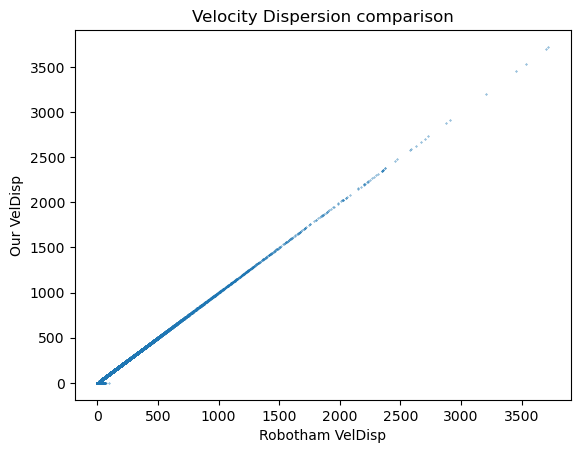

In [13]:
plt.scatter(df2['VelDisp'], df2['VelDisp_calc'],s=0.1)
plt.xlabel('Robotham VelDisp')
plt.ylabel('Our VelDisp')
plt.title('Velocity Dispersion comparison')
plt.show()

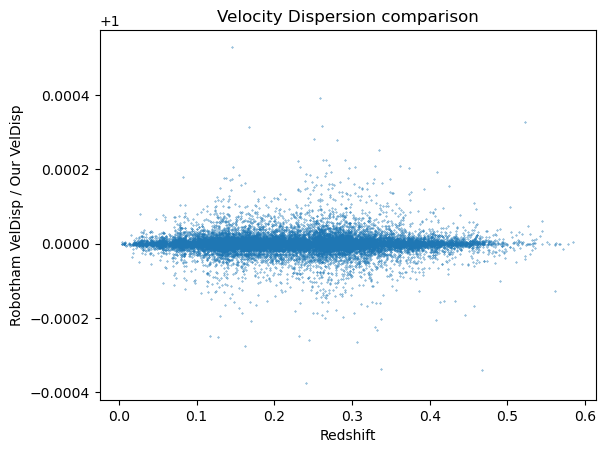

In [14]:
plt.scatter(df2['Zfof'], df2['VelDisp']/df2['VelDisp_calc'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham VelDisp / Our VelDisp')
plt.title('Velocity Dispersion comparison')
plt.show()

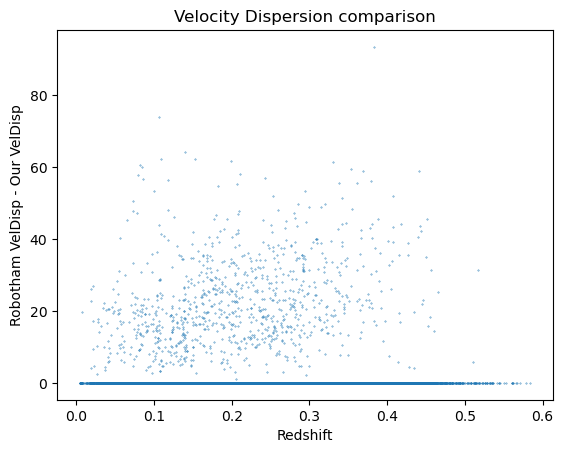

In [15]:
plt.scatter(df2['Zfof'], df2['VelDisp']-df2['VelDisp_calc'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham VelDisp - Our VelDisp')
plt.title('Velocity Dispersion comparison')
plt.show()

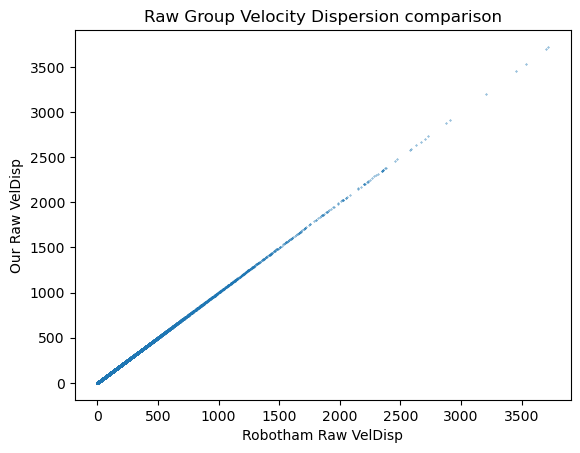

In [16]:
plt.scatter(df2['VelDispRaw'], df2['VelDisp_raw'],s=0.1)
plt.xlabel('Robotham Raw VelDisp')
plt.ylabel('Our Raw VelDisp')
plt.title('Raw Group Velocity Dispersion comparison')
plt.show()

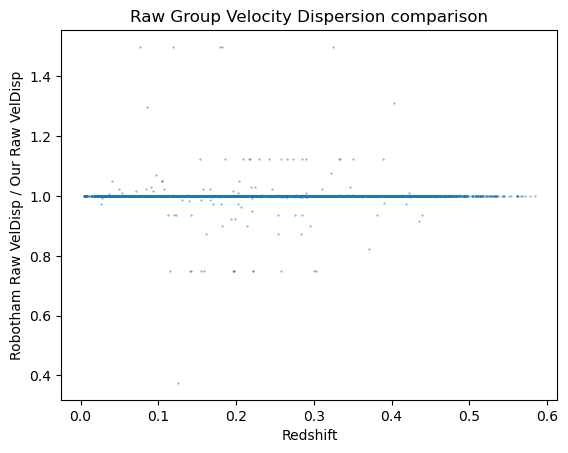

In [17]:
plt.scatter(df2['Zfof'], df2['VelDispRaw']/df2['VelDisp_raw'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham Raw VelDisp / Our Raw VelDisp')
plt.title('Raw Group Velocity Dispersion comparison')
plt.show()

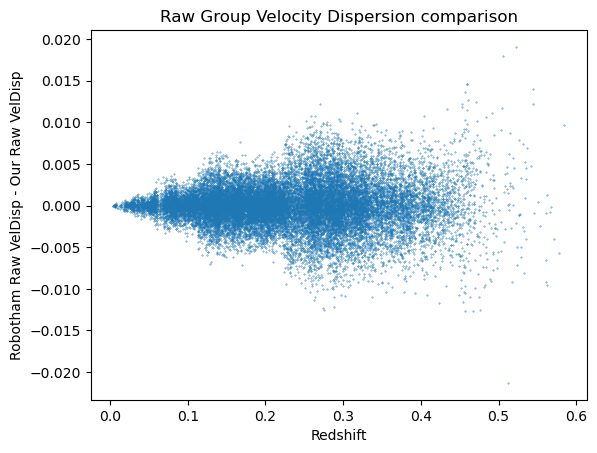

In [18]:
plt.scatter(df2['Zfof'], df2['VelDispRaw']-df2['VelDisp_raw'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham Raw VelDisp - Our Raw VelDisp')
plt.title('Raw Group Velocity Dispersion comparison')
plt.show()

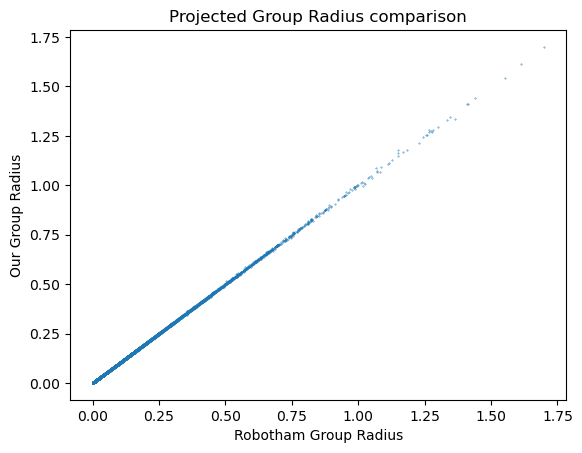

In [19]:
plt.scatter(df2['Rad50'], df2['Rad'],s=0.1)
plt.xlabel('Robotham Group Radius')
plt.ylabel('Our Group Radius')
plt.title('Projected Group Radius comparison')
plt.show()

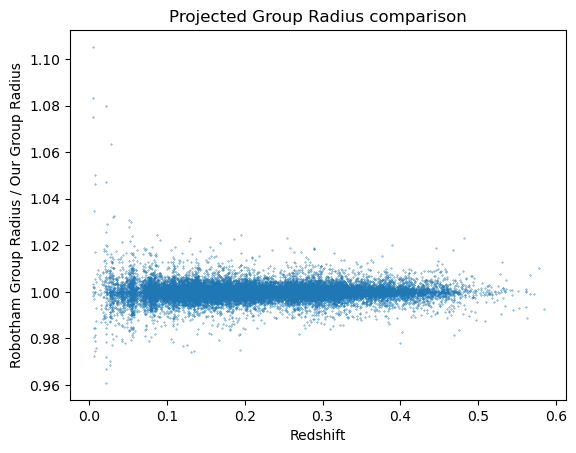

In [20]:
plt.scatter(df2['Zfof'], df2['Rad50']/df2['Rad'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham Group Radius / Our Group Radius')
plt.title('Projected Group Radius comparison')
plt.show()

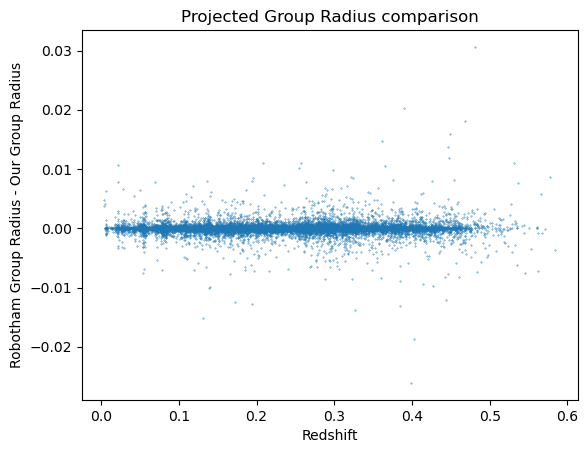

In [21]:
plt.scatter(df2['Zfof'], df2['Rad50']-df2['Rad'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham Group Radius - Our Group Radius')
plt.title('Projected Group Radius comparison')
plt.show()

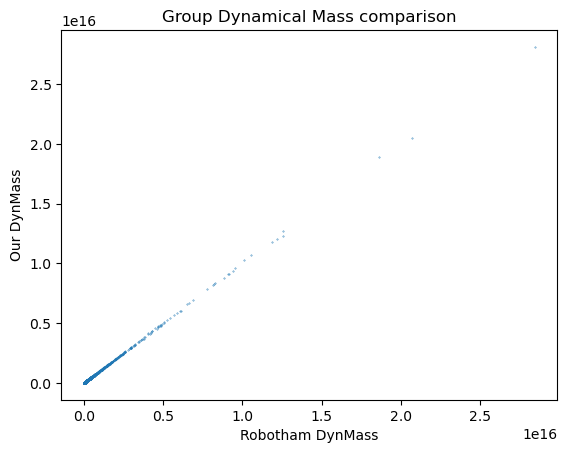

In [22]:
plt.scatter(df2['MassA'], df2['DynMass'],s=0.1)
plt.xlabel('Robotham DynMass')
plt.ylabel('Our DynMass')
plt.title('Group Dynamical Mass comparison')
plt.show()

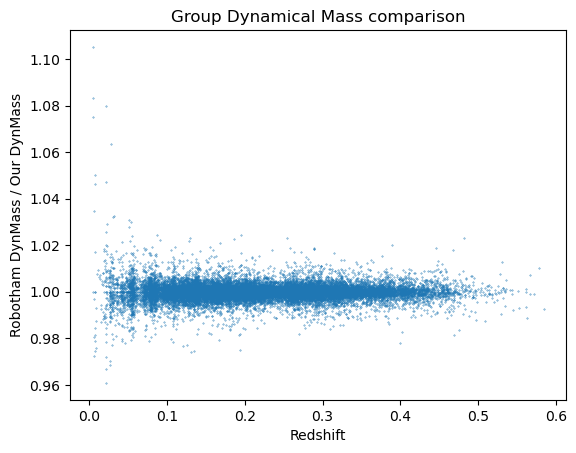

In [23]:
plt.scatter(df2['Zfof'], df2['MassA']/df2['DynMass'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham DynMass / Our DynMass')
plt.title('Group Dynamical Mass comparison')
plt.show()

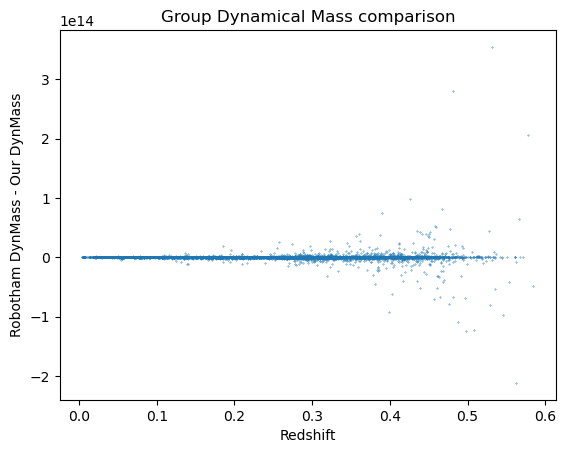

In [24]:
plt.scatter(df2['Zfof'], df2['MassA']-df2['DynMass'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham DynMass - Our DynMass')
plt.title('Group Dynamical Mass comparison')
plt.show()

In [25]:
df5 = df2.copy()
df5 = df5[df5['Nfof']>=5]

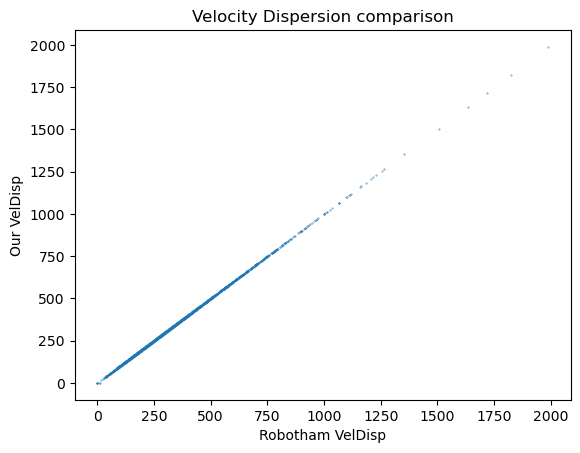

In [26]:
plt.scatter(df5['VelDisp'], df5['VelDisp_calc'],s=0.1)
plt.xlabel('Robotham VelDisp')
plt.ylabel('Our VelDisp')
plt.title('Velocity Dispersion comparison')
plt.show()

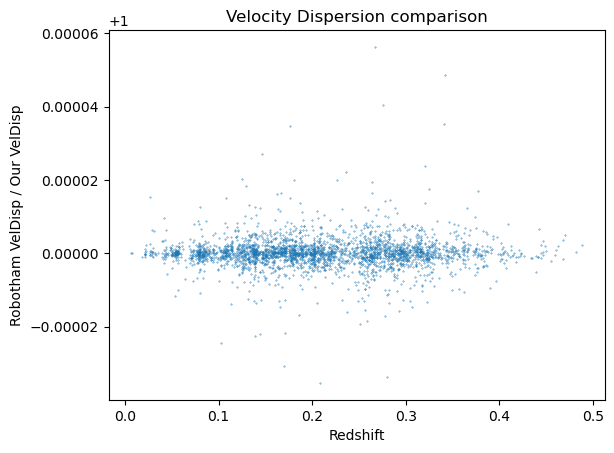

In [27]:
plt.scatter(df5['Zfof'], df5['VelDisp']/df5['VelDisp_calc'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham VelDisp / Our VelDisp')
plt.title('Velocity Dispersion comparison')
plt.show()

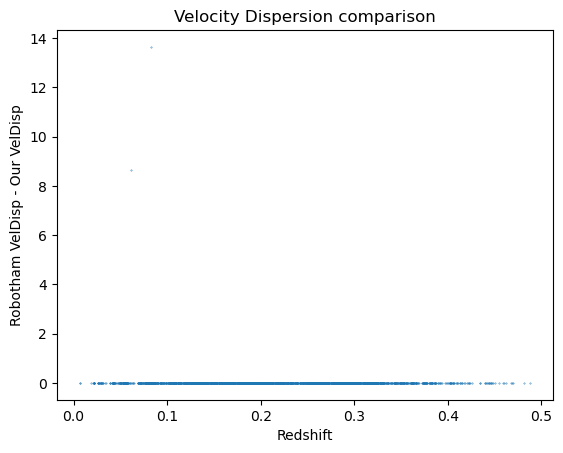

In [28]:
plt.scatter(df5['Zfof'], df5['VelDisp']-df5['VelDisp_calc'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham VelDisp - Our VelDisp')
plt.title('Velocity Dispersion comparison')
plt.show()

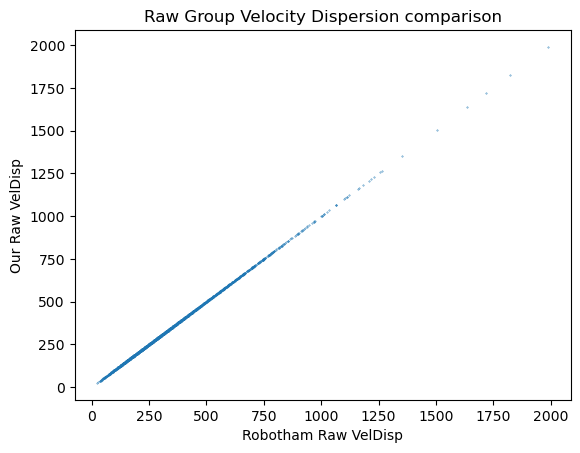

In [29]:
plt.scatter(df5['VelDispRaw'], df5['VelDisp_raw'],s=0.1)
plt.xlabel('Robotham Raw VelDisp')
plt.ylabel('Our Raw VelDisp')
plt.title('Raw Group Velocity Dispersion comparison')
plt.show()

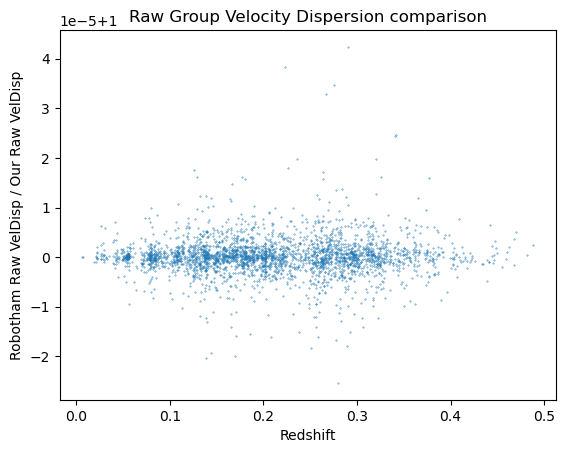

In [30]:
plt.scatter(df5['Zfof'], df5['VelDispRaw']/df5['VelDisp_raw'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham Raw VelDisp / Our Raw VelDisp')
plt.title('Raw Group Velocity Dispersion comparison')
plt.show()

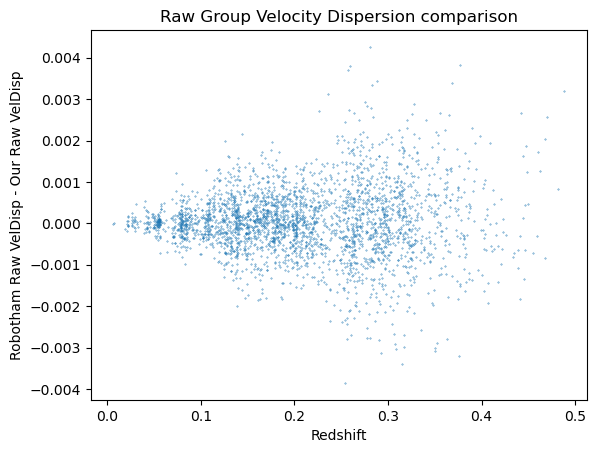

In [31]:
plt.scatter(df5['Zfof'], df5['VelDispRaw']-df5['VelDisp_raw'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham Raw VelDisp - Our Raw VelDisp')
plt.title('Raw Group Velocity Dispersion comparison')
plt.show()

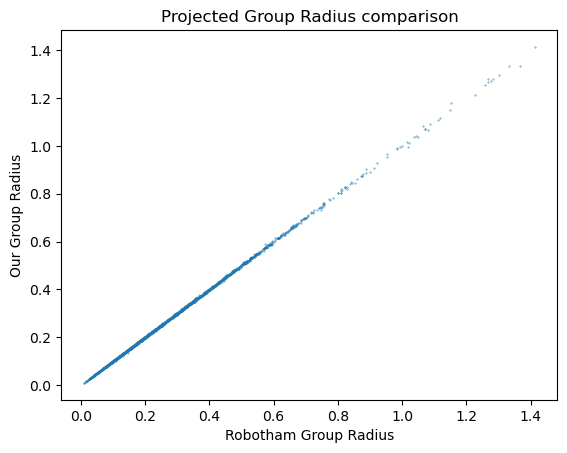

In [32]:
plt.scatter(df5['Rad50'], df5['Rad'],s=0.1)
plt.xlabel('Robotham Group Radius')
plt.ylabel('Our Group Radius')
plt.title('Projected Group Radius comparison')
plt.show()

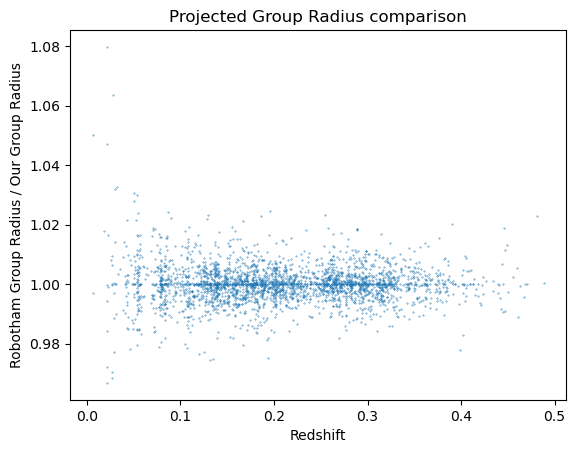

In [33]:
plt.scatter(df5['Zfof'], df5['Rad50']/df5['Rad'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham Group Radius / Our Group Radius')
plt.title('Projected Group Radius comparison')
plt.show()

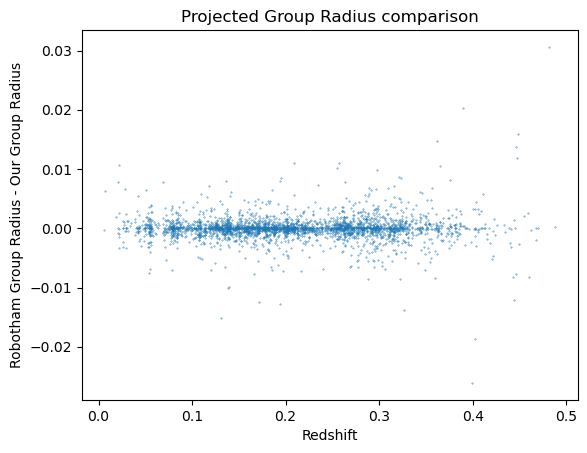

In [34]:
plt.scatter(df5['Zfof'], df5['Rad50']-df5['Rad'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham Group Radius - Our Group Radius')
plt.title('Projected Group Radius comparison')
plt.show()

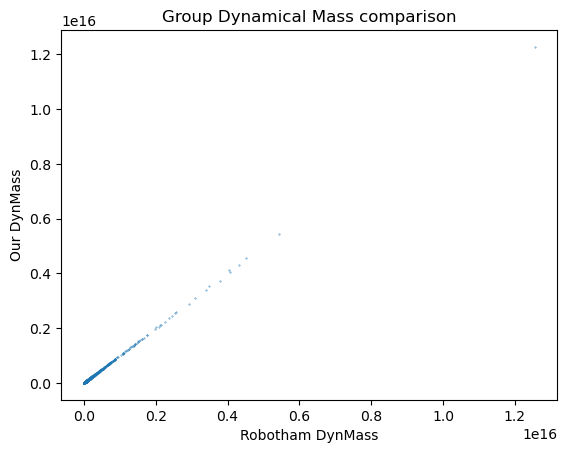

In [35]:
plt.scatter(df5['MassA'], df5['DynMass'],s=0.1)
plt.xlabel('Robotham DynMass')
plt.ylabel('Our DynMass')
plt.title('Group Dynamical Mass comparison')
plt.show()

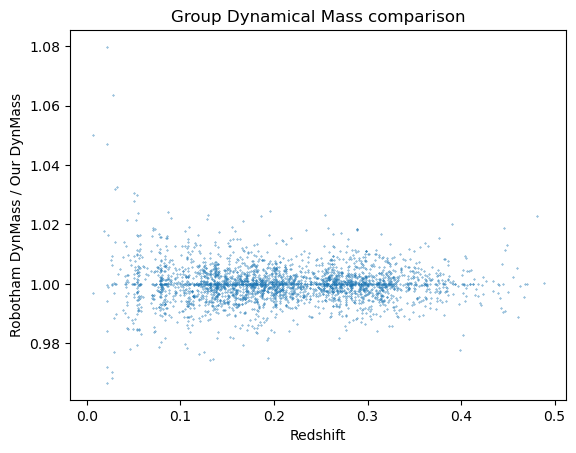

In [36]:
plt.scatter(df5['Zfof'], df5['MassA']/df5['DynMass'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham DynMass / Our DynMass')
plt.title('Group Dynamical Mass comparison')
plt.show()

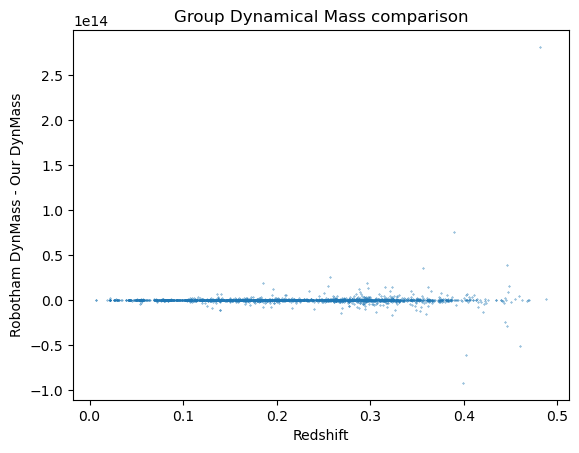

In [37]:
plt.scatter(df5['Zfof'], df5['MassA']-df5['DynMass'],s=0.1)
plt.xlabel('Redshift')
plt.ylabel('Robotham DynMass - Our DynMass')
plt.title('Group Dynamical Mass comparison')
plt.show()

In [38]:
df2

,GroupID,Nfof,IterCenCATAID,IterCenRA,IterCenDec,IterCenZ,Zfof,Rad50,Rad1Sig,Rad100,...,d2raz,d2decz,distortcirc,distortellip,distortsph,URL_IMG,VelDisp_raw,VelDisp_calc,Rad,DynMass
0,100001,62,622475,133.652530,0.642573,0.108074,0.108044,0.350337,0.511327,0.723547,...,19.432892,22.070499,1.044060,1.147736,2.456856,http://www.gama-survey.org/dr4/data/files/Grou...,748.951271,747.927486,0.349529,4.546035e+14
1,100002,59,599753,132.599724,0.260119,0.197270,0.197310,0.475004,0.583933,1.592990,...,15.836410,25.748030,1.316447,1.324571,2.274148,http://www.gama-survey.org/dr4/data/files/Grou...,545.753034,544.217609,0.479282,3.300402e+14
2,100003,76,575146,138.519864,-0.023528,0.167690,0.167680,1.071943,1.818537,3.015239,...,16.040085,29.723379,1.258020,1.329273,2.125130,http://www.gama-survey.org/dr4/data/files/Grou...,412.356658,410.792499,1.070179,4.198866e+14
3,100004,37,549404,131.435402,-0.488043,0.156034,0.156474,0.267129,0.302825,0.627853,...,7.228287,8.428942,1.095464,1.274427,2.257251,http://www.gama-survey.org/dr4/data/files/Grou...,453.979772,452.386848,0.272087,1.294670e+14
4,100005,34,387173,135.502599,2.393273,0.202819,0.202638,0.457391,0.611274,1.019182,...,15.201762,12.295998,1.093525,1.199399,2.183090,http://www.gama-survey.org/dr4/data/files/Grou...,592.660688,591.534095,0.462006,3.758702e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26189,402536,2,2553485,38.413094,-3.800079,0.324514,0.323355,0.119764,0.162879,0.239528,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,http://www.gama-survey.org/dr4/data/files/Grou...,658.215849,656.902917,0.119366,1.197602e+14
26190,402537,2,2553514,38.444132,-3.775456,0.322746,0.322606,0.040510,0.055094,0.081021,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,http://www.gama-survey.org/dr4/data/files/Grou...,79.530968,58.358009,0.040494,3.206446e+11
26191,402538,2,2558880,38.404854,-3.741646,0.274162,0.274447,0.082920,0.112771,0.165839,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,http://www.gama-survey.org/dr4/data/files/Grou...,167.959891,165.944012,0.083001,5.314158e+12
26192,402539,2,2562629,37.469491,-5.626938,0.175668,0.175309,0.060657,0.082494,0.121315,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,http://www.gama-survey.org/dr4/data/files/Grou...,229.888042,228.041512,0.060538,7.319534e+12


In [39]:
df5

,GroupID,Nfof,IterCenCATAID,IterCenRA,IterCenDec,IterCenZ,Zfof,Rad50,Rad1Sig,Rad100,...,d2raz,d2decz,distortcirc,distortellip,distortsph,URL_IMG,VelDisp_raw,VelDisp_calc,Rad,DynMass
0,100001,62,622475,133.652530,0.642573,0.108074,0.108044,0.350337,0.511327,0.723547,...,19.432892,22.070499,1.044060,1.147736,2.456856,http://www.gama-survey.org/dr4/data/files/Grou...,748.951271,747.927486,0.349529,4.546035e+14
1,100002,59,599753,132.599724,0.260119,0.197270,0.197310,0.475004,0.583933,1.592990,...,15.836410,25.748030,1.316447,1.324571,2.274148,http://www.gama-survey.org/dr4/data/files/Grou...,545.753034,544.217609,0.479282,3.300402e+14
2,100003,76,575146,138.519864,-0.023528,0.167690,0.167680,1.071943,1.818537,3.015239,...,16.040085,29.723379,1.258020,1.329273,2.125130,http://www.gama-survey.org/dr4/data/files/Grou...,412.356658,410.792499,1.070179,4.198866e+14
3,100004,37,549404,131.435402,-0.488043,0.156034,0.156474,0.267129,0.302825,0.627853,...,7.228287,8.428942,1.095464,1.274427,2.257251,http://www.gama-survey.org/dr4/data/files/Grou...,453.979772,452.386848,0.272087,1.294670e+14
4,100005,34,387173,135.502599,2.393273,0.202819,0.202638,0.457391,0.611274,1.019182,...,15.201762,12.295998,1.093525,1.199399,2.183090,http://www.gama-survey.org/dr4/data/files/Grou...,592.660688,591.534095,0.462006,3.758702e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24096,400443,6,1541643,30.591505,-5.785157,0.192941,0.193210,0.324257,0.453901,0.750020,...,0.522408,0.661994,1.601507,2.125329,2.835253,http://www.gama-survey.org/dr4/data/files/Grou...,134.536203,131.888484,0.324267,1.311437e+13
24112,400459,5,2342610,36.797545,-4.392453,0.176420,0.176450,0.199222,0.220492,0.323708,...,0.059721,0.281363,1.514564,1.946120,2.819817,http://www.gama-survey.org/dr4/data/files/Grou...,71.603021,54.743862,0.199298,1.388686e+12
24116,400463,8,1905466,37.094311,-4.049182,0.332920,0.328645,0.821756,0.978278,1.363144,...,2.951111,3.961089,1.145293,1.855056,2.339785,http://www.gama-survey.org/dr4/data/files/Grou...,506.826385,505.722880,0.822163,4.888926e+14
24325,400672,5,1561143,30.442898,-4.629075,0.179304,0.178146,0.142077,0.155698,0.237543,...,0.555036,0.428023,1.173731,2.067015,3.863380,http://www.gama-survey.org/dr4/data/files/Grou...,399.503827,396.289682,0.141387,5.162555e+13
